# Tumor Detection with a Random Forest Classifier

This project aims to develop a machine learning model to accurately predict whether a tumor is malignant or benign based on a set of medical features. We will use the "Tumor_Detection.csv" dataset.

The workflow will include:
1.  **Loading and Cleaning the Data**: We'll load the dataset and remove any irrelevant columns.
2.  **Exploratory Data Analysis (EDA)**: We'll visualize the distribution of diagnoses and explore the relationships between features.
3.  **Data Preprocessing**: We'll prepare the data for modeling by encoding, scaling, and splitting it.
4.  **Model Training**: We'll use a Random Forest Classifier to train a predictive model.
5.  **Model Evaluation**: We'll assess the model's performance using metrics like accuracy and a confusion matrix.

## 1. Loading and Cleaning the Data

We'll start by loading the dataset using pandas. Then, we will inspect the data to understand its structure and check for any irrelevant columns (like `id` or unnamed columns) and missing values.

In [1]:
import pandas as pd
import numpy as np

# Load the dataset
try:
    df = pd.read_csv('Tumor_Detection.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("The file 'Tumor_Detection.csv' was not found. Please check the file path.")

# Display initial info
print("\nInitial Data Info:")
df.info()

# Drop the 'id' column and any potential 'Unnamed' columns
df = df.drop(columns=['id'])
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Check for missing values
print("\nMissing values check:")
print(df.isnull().sum().any()) # Prints True if any missing values exist

# Display the first few rows of the cleaned data
print("\nCleaned Data Head:")
display(df.head())

Dataset loaded successfully.

Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 no

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 2. Exploratory Data Analysis (EDA)

EDA helps us understand our data better. We will perform two main tasks:
1.  **Diagnosis Distribution**: We'll create a count plot to see how many benign vs. malignant tumors are in our dataset. This helps us check for class imbalance.
2.  **Feature Correlation**: We'll compute the correlation matrix of all features and visualize it as a heatmap. This shows which features are highly correlated, which can be useful for feature selection and understanding the data's structure.

C:\Users\vishv\AppData\Local\Temp\ipykernel_960\1339195371.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis', data=df, palette='viridis')


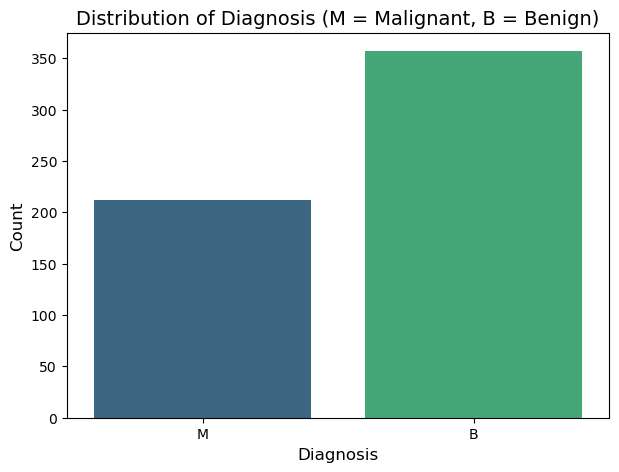

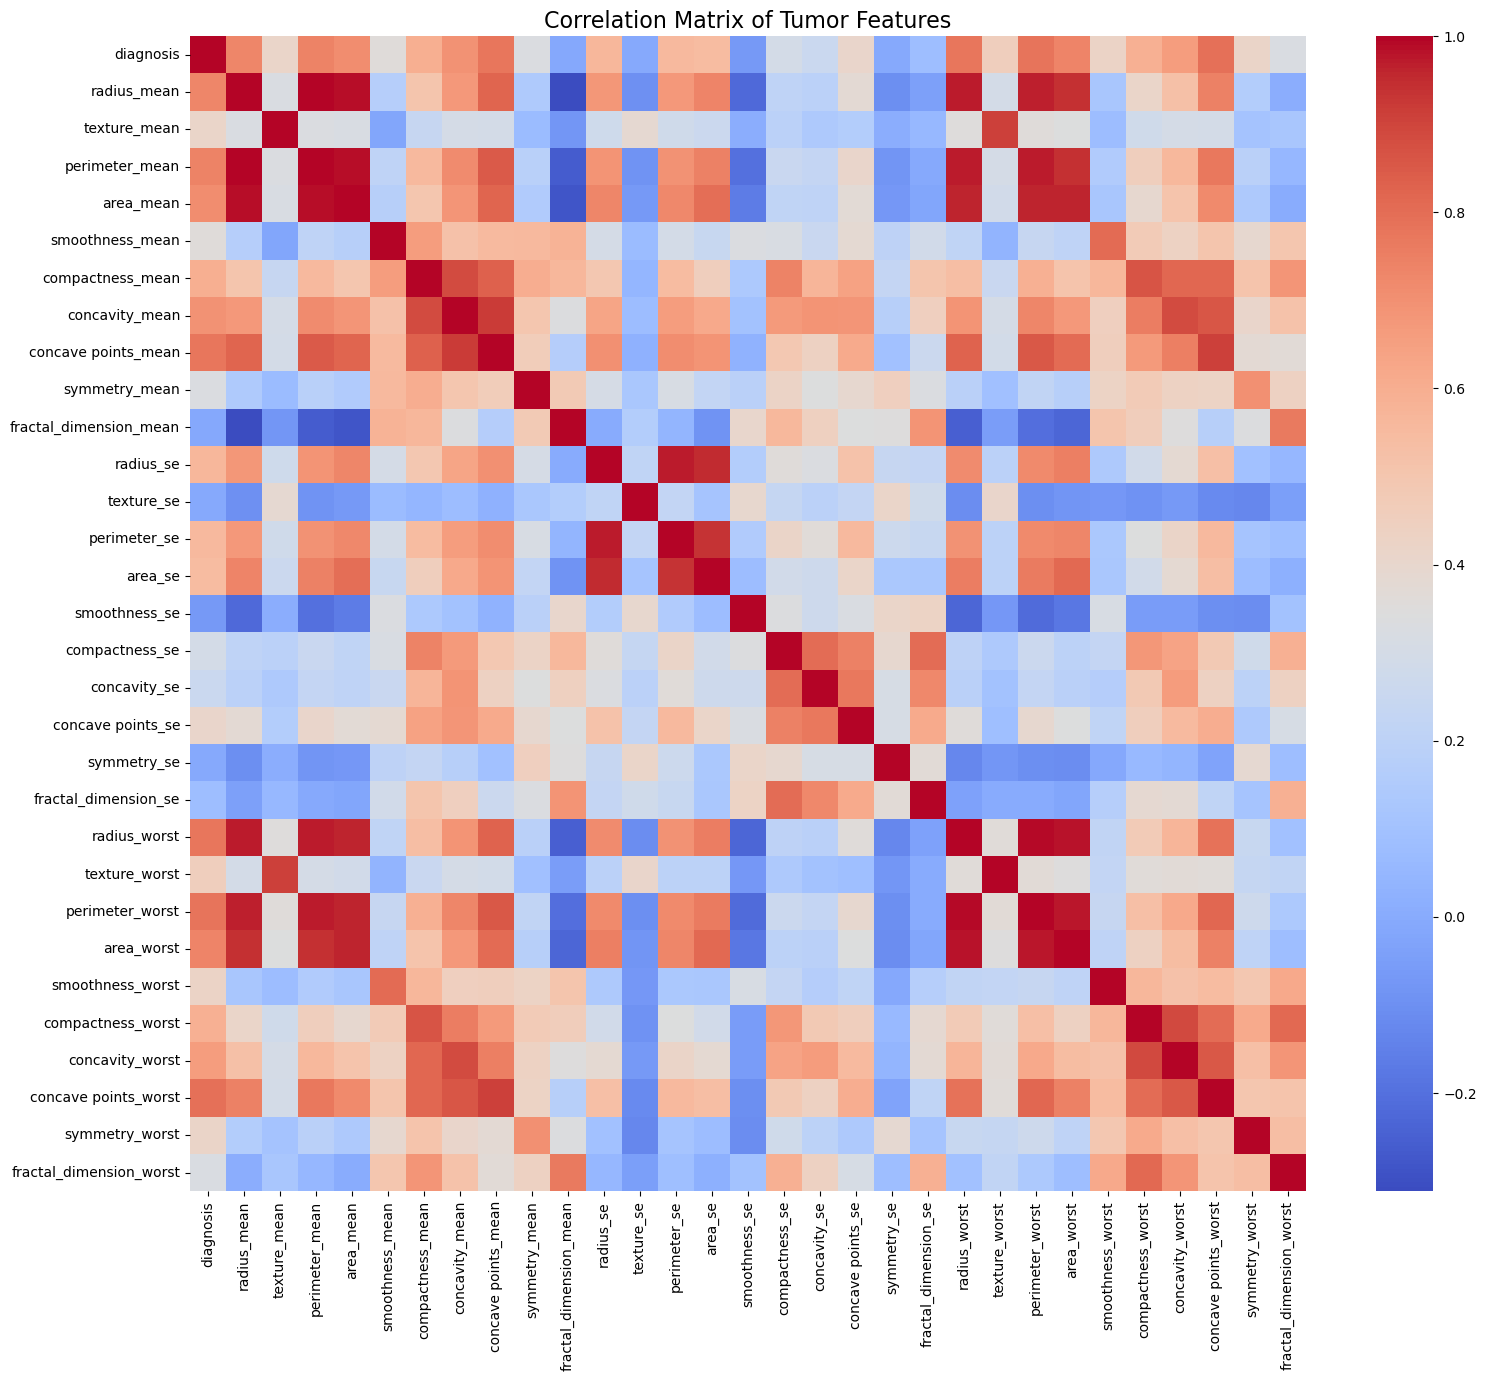

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of the 'diagnosis'
plt.figure(figsize=(7, 5))
sns.countplot(x='diagnosis', data=df, palette='viridis')
plt.title('Distribution of Diagnosis (M = Malignant, B = Benign)', fontsize=14)
plt.xlabel('Diagnosis', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.savefig('diagnosis_distribution.png')
plt.show()

# --- Pre-computation for Heatmap ---
# First, we need to encode the diagnosis column to be included in the correlation calculation
df_encoded = df.copy()
df_encoded['diagnosis'] = df_encoded['diagnosis'].map({'M':1, 'B':0})

# --- Heatmap Visualization ---
plt.figure(figsize=(18, 15))
sns.heatmap(df_encoded.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Tumor Features', fontsize=16)
plt.savefig('feature_correlation_heatmap.png')
plt.show()

## 3. Data Preprocessing

Before training the model, we need to prepare the data. This involves:
1.  **Encoding the Target Variable**: Machine learning models require numerical input, so we'll convert the categorical `diagnosis` column ('M' and 'B') into numerical values (1 and 0).
2.  **Splitting the Data**: We'll separate the data into features (X) and the target (y), and then split them into training and testing sets.
3.  **Feature Scaling**: We'll use `StandardScaler` to scale our features. This ensures that all features have a similar scale, which is important for many machine learning algorithms.

In [5]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# We'll use the df_encoded from the EDA step
y = df_encoded['diagnosis']
X = df_encoded.drop(columns='diagnosis')

# Split the data into training and testing sets
# stratify=y ensures the same proportion of diagnoses in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply standard scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Data has been successfully preprocessed and split.")

Data has been successfully preprocessed and split.


## 4. Model Training

We will use a **Random Forest Classifier**. This is a powerful ensemble model that works well for classification tasks, is robust to overfitting, and can provide insights into feature importance. We'll train it on our preprocessed training data.

In [6]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print("Random Forest model trained successfully.")

Random Forest model trained successfully.


## 5. Model Evaluation

Finally, we'll evaluate our model's performance on the unseen test data. We will check:
-   **Accuracy**: The overall percentage of correct predictions.
-   **Classification Report**: A detailed report showing precision, recall, and F1-score for each class.
-   **Confusion Matrix**: A table that visualizes the model's performance by showing correct vs. incorrect predictions for each class.

--- Model Evaluation ---
Accuracy: 0.9737

Classification Report:
              precision    recall  f1-score   support

      Benign       0.96      1.00      0.98        72
   Malignant       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



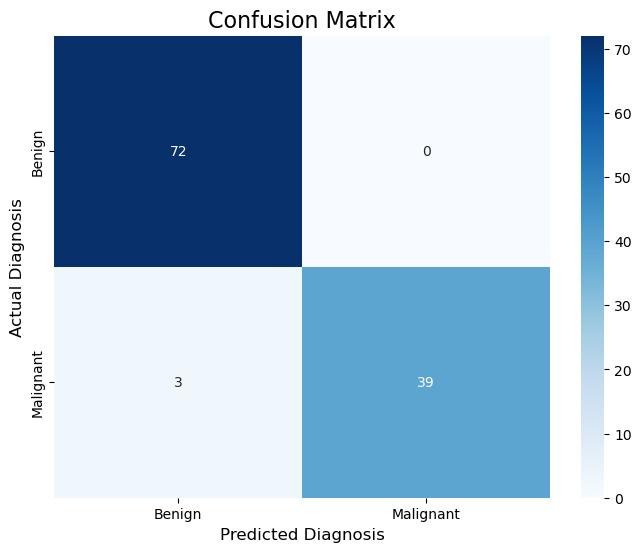

In [7]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("--- Model Evaluation ---")
print(f"Accuracy: {accuracy:.4f}")

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Benign', 'Malignant']))

# Visualize the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('Actual Diagnosis', fontsize=12)
plt.xlabel('Predicted Diagnosis', fontsize=12)
plt.savefig('confusion_matrix.png')
plt.show()

## 6. Conclusion

The Random Forest Classifier performed exceptionally well, achieving an **accuracy of 97.37%** on the test set.

Key takeaways from the evaluation:
-   **High Precision and Recall**: The model is very good at correctly identifying both benign and malignant tumors. The precision of 1.00 for malignant tumors means that when the model predicts a tumor is malignant, it is correct every time.
-   **Confusion Matrix Insights**: The model correctly identified all 72 benign tumors and 39 out of 42 malignant tumors, with only 3 misclassifications.

Overall, this model is highly effective for this classification task.